# Aux

In [2]:
import torch
import torch.optim as optim
#%pip install torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, TensorDataset
import numpy as np

#
import torch
import torch.nn as nn
import torch.optim as optim

#%pip install pennylane --user
import pennylane as qml
from pennylane import numpy as np

import sys
import os

src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from circuits.convolution.default import default_circuit, custom_circuit
from circuits.convolution.full_entanglement_circuit import full_entanglement_circuit
from circuits.convolution.NQ_circuit import NQ_circuit
from circuits.convolution.no_entanglement_circuit import no_entanglement_random_circuit
from circuits.embedding.default import default_embedding, custom_embedding
from circuits.embedding.IQP_embedding import custom_iqp_embedding
from circuits.embedding.NQE_embedding import NQE_embedding
from circuits.embedding.templates import angle_embedding, amplitude_embedding, QAOA_embedding, displacement_embedding, squeezing_embedding
from circuits.measurement.default import default_measurement, custom_measurement
from layers.quanvolution import QuanvLayer
from models.quanvolutional_net import QuanvolutionalNet
from utils.data_loader import load_mnist_data, load_eurosat_data
from circuits.embedding.ring_embedding import ring_embedding
from circuits.embedding.waterfall_embedding import waterfall_embedding

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Train

In [11]:
#%pip install qcml
#%pip install scikit-learn
#%pip install dask
#%pip install pynvml
#%pip install pandas
#%pip install matplotlib --user
#%pip install seaborn
#%pip install jax
from qcml.bench.grid_search import GridSearch
from qcml.utils.log import log_setup
import os

log_settings = {
    "output": "both",
    "terminal_level": "INFO",
    "file_level": "DEBUG",
    "hide_logs": ["jax", "pennylane", "bokeh", "distributed"],
    "slack_notify": False
}

log_setup(**log_settings)

limit = None
data = 'Eurosat'

if data == 'MNIST':
    X_train, y_train, X_val, y_val = load_mnist_data(batch_size=4, output='np', limit=limit)

elif data == 'Eurosat':
    X_train, y_train, X_val, y_val = load_eurosat_data(batch_size=4, output='np', limit=limit)

os.environ["JAX_PLATFORM_NAME"] = "cpu"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
torch.backends.cudnn.benchmark = True

2024-11-27 08:36:14,921 - root - INFO - Logging is set up. (log.py:391)
2024-11-27 08:36:14,925 - root - INFO - jax logs are set to ERROR level. (log.py:421)
2024-11-27 08:36:14,930 - root - INFO - pennylane logs are set to ERROR level. (log.py:421)
2024-11-27 08:36:14,935 - root - INFO - bokeh logs are set to ERROR level. (log.py:421)
2024-11-27 08:36:14,939 - root - INFO - distributed logs are set to ERROR level. (log.py:421)


Using device: cuda


2024-11-27 08:43:54,490 - qcml.bench.grid_search - INFO - Starting grid search with QuanvolutionalNet, 4 combinations, 12 parallel jobs (grid_search.py:165)


Epoch 1/10, Loss: 1.5570, Accuracy: 0.4175
Epoch 2/10, Loss: 1.2777, Accuracy: 0.5351
Epoch 3/10, Loss: 1.2247, Accuracy: 0.5587
Epoch 4/10, Loss: 1.1892, Accuracy: 0.5713
Epoch 5/10, Loss: 1.1774, Accuracy: 0.5799
Epoch 6/10, Loss: 1.1318, Accuracy: 0.5952
Epoch 7/10, Loss: 1.1285, Accuracy: 0.5967
Epoch 8/10, Loss: 1.1140, Accuracy: 0.6030
Epoch 9/10, Loss: 1.1004, Accuracy: 0.6056
Epoch 10/10, Loss: 1.0859, Accuracy: 0.6107


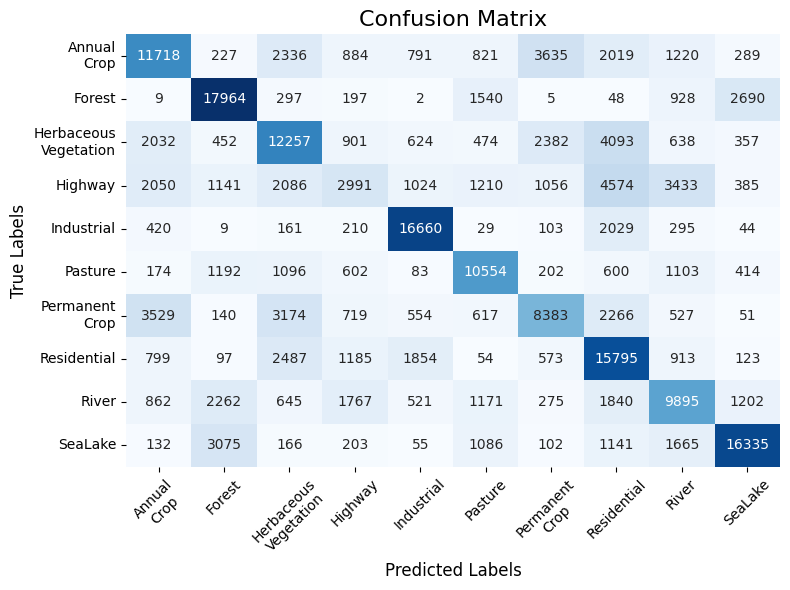

2024-11-27 08:45:10,989 - qcml.bench.grid_search - INFO - Evaluated params: {'qkernel_shape': 2, 'classical_kernel_shape': 2, 'embedding': <function ring_embedding at 0x0000018A45671240>, 'circuit': <function no_entanglement_random_circuit at 0x0000018A45670B80>, 'measurement': <function default_measurement at 0x0000018A45671360>, 'params': {'embedding': {'n_repeats': 1}}, 'n_classes': 10, 'learning_rate': 0.01, 'use_quantum': False, 'plot': True, 'data': 'Eurosat'}, accuracy: 0.6130 (grid_search.py:241)


Epoch 1/10, Loss: 1.5664, Accuracy: 0.4113
Epoch 2/10, Loss: 1.2860, Accuracy: 0.5333
Epoch 3/10, Loss: 1.2110, Accuracy: 0.5652
Epoch 4/10, Loss: 1.1742, Accuracy: 0.5791
Epoch 5/10, Loss: 1.1392, Accuracy: 0.5945
Epoch 6/10, Loss: 1.1251, Accuracy: 0.5973
Epoch 7/10, Loss: 1.1234, Accuracy: 0.5977
Epoch 8/10, Loss: 1.0977, Accuracy: 0.6047
Epoch 9/10, Loss: 1.0777, Accuracy: 0.6123
Epoch 10/10, Loss: 1.0708, Accuracy: 0.6145


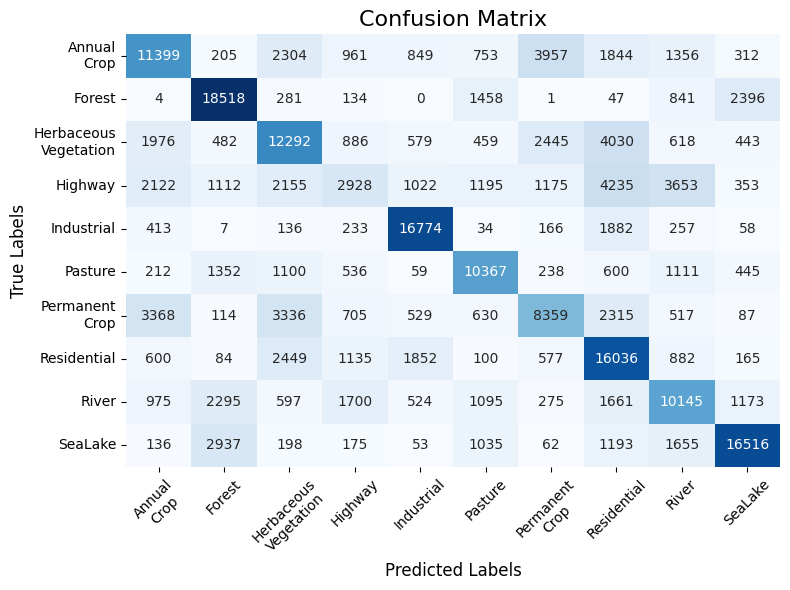

2024-11-27 08:46:33,256 - qcml.bench.grid_search - INFO - Evaluated params: {'qkernel_shape': 2, 'classical_kernel_shape': 3, 'embedding': <function ring_embedding at 0x0000018A45671240>, 'circuit': <function no_entanglement_random_circuit at 0x0000018A45670B80>, 'measurement': <function default_measurement at 0x0000018A45671360>, 'params': {'embedding': {'n_repeats': 1}}, 'n_classes': 10, 'learning_rate': 0.01, 'use_quantum': False, 'plot': True, 'data': 'Eurosat'}, accuracy: 0.6315 (grid_search.py:241)


Epoch 1/10, Loss: 1.6155, Accuracy: 0.3987
Epoch 2/10, Loss: 1.3752, Accuracy: 0.4992
Epoch 3/10, Loss: 1.3101, Accuracy: 0.5247
Epoch 4/10, Loss: 1.2883, Accuracy: 0.5327
Epoch 5/10, Loss: 1.2722, Accuracy: 0.5366
Epoch 6/10, Loss: 1.2553, Accuracy: 0.5462
Epoch 7/10, Loss: 1.2478, Accuracy: 0.5470
Epoch 8/10, Loss: 1.2300, Accuracy: 0.5586
Epoch 9/10, Loss: 1.2307, Accuracy: 0.5587
Epoch 10/10, Loss: 1.2273, Accuracy: 0.5600


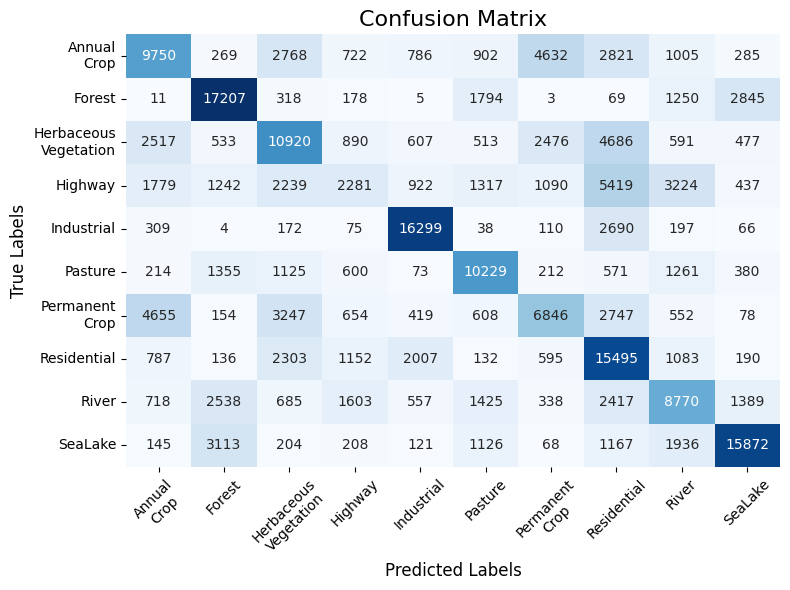

2024-11-27 08:47:49,698 - qcml.bench.grid_search - INFO - Evaluated params: {'qkernel_shape': 3, 'classical_kernel_shape': 2, 'embedding': <function ring_embedding at 0x0000018A45671240>, 'circuit': <function no_entanglement_random_circuit at 0x0000018A45670B80>, 'measurement': <function default_measurement at 0x0000018A45671360>, 'params': {'embedding': {'n_repeats': 1}}, 'n_classes': 10, 'learning_rate': 0.01, 'use_quantum': False, 'plot': True, 'data': 'Eurosat'}, accuracy: 0.5498 (grid_search.py:241)


Epoch 1/10, Loss: 1.6064, Accuracy: 0.3989
Epoch 2/10, Loss: 1.3700, Accuracy: 0.5074
Epoch 3/10, Loss: 1.2908, Accuracy: 0.5393
Epoch 4/10, Loss: 1.2619, Accuracy: 0.5445
Epoch 5/10, Loss: 1.2526, Accuracy: 0.5519
Epoch 6/10, Loss: 1.2380, Accuracy: 0.5569
Epoch 7/10, Loss: 1.2327, Accuracy: 0.5576
Epoch 8/10, Loss: 1.2042, Accuracy: 0.5686
Epoch 9/10, Loss: 1.2125, Accuracy: 0.5660
Epoch 10/10, Loss: 1.2254, Accuracy: 0.5589


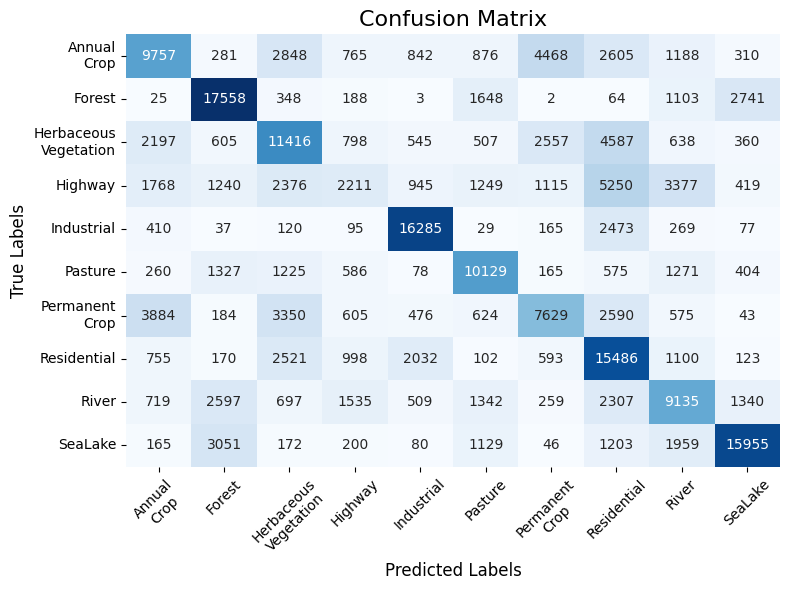

2024-11-27 08:49:10,040 - qcml.bench.grid_search - INFO - Evaluated params: {'qkernel_shape': 3, 'classical_kernel_shape': 3, 'embedding': <function ring_embedding at 0x0000018A45671240>, 'circuit': <function no_entanglement_random_circuit at 0x0000018A45670B80>, 'measurement': <function default_measurement at 0x0000018A45671360>, 'params': {'embedding': {'n_repeats': 1}}, 'n_classes': 10, 'learning_rate': 0.01, 'use_quantum': False, 'plot': True, 'data': 'Eurosat'}, accuracy: 0.5485 (grid_search.py:241)
2024-11-27 08:49:10,049 - qcml.utils.storage - INFO - Results saved to results/grid_search/QuanvolutionalNet-quantum_mnist_ring,_best-hypa.csv, file size: 2162 bytes (storage.py:48)


In [12]:
import itertools

embedding_type = "ring"

qkernel_shape = [2, 3]
classical_kernel_shape = [2, 3]

if embedding_type == "angle":

    # Angle embedding

    embedding = angle_embedding
    circuit = no_entanglement_random_circuit
    params = {}

    lrs = torch.linspace(0.009, 0.08, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs] 
    

elif embedding_type == "amplitude":

    # Amplitude embedding

    embedding = amplitude_embedding
    circuit = no_entanglement_random_circuit
    params = {}

    lrs = torch.linspace(0.008, 0.03, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]
    

elif embedding_type == "IQP":

    # IQP embedding

    embedding = custom_iqp_embedding
    circuit = full_entanglement_circuit
    params = {"embedding": {"n_repeats": 2},
              "circuit": {"num_layers": 2}}

    lrs = torch.linspace(0.008, 0.05, 5, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]

elif embedding_type == "NQE":

    # NQE embedding

    embedding = NQE_embedding
    circuit = NQ_circuit
    params = {"embedding": {"n_repeats": 2}}

    lrs = torch.linspace(0.008, 0.05, 5, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]

elif embedding_type == "displacement":

    # Displacement embedding

    embedding = displacement_embedding
    circuit = no_entanglement_random_circuit
    params = {}

    lrs = torch.linspace(0.009, 0.08, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]

elif embedding_type == "squeezing":

    # Squeezing embedding

    embedding = squeezing_embedding
    circuit = no_entanglement_random_circuit
    params = {}

    lrs = torch.linspace(0.009, 0.08, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]

elif embedding_type == "QAOA":

    # Squeezing embedding

    embedding = QAOA_embedding
    circuit = NQ_circuit
    params = {"embedding": {"qkernel_shape": 3}}

    lrs = torch.linspace(0.009, 0.03, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]

elif embedding_type == "ring":

    # Ring embedding

    embedding = ring_embedding
    circuit = no_entanglement_random_circuit
    
    params = {"embedding":{"n_repeats": 1}}

    lrs = torch.linspace(0.009, 0.02, 3, requires_grad=False)
    learning_rates = [lr.item() for lr in lrs]
    
    learning_rates = [0.01]

model_grid = {
        "qkernel_shape": qkernel_shape,
        "classical_kernel_shape": classical_kernel_shape,
        "embedding":[embedding],
        "circuit":[circuit],
        "measurement":[default_measurement],
        "params":[params],
        "n_classes":[10],
        "learning_rate": learning_rates,
        "use_quantum": [False],
        "plot": [True],
        "data": [data]
    }

experiment_name = "quantum_mnist_" + embedding_type + ","

gs = GridSearch(
    classifiers=[QuanvolutionalNet],
    param_grid=model_grid,
    #combinations=combinations,
    batch_size=50,
    experiment_name=experiment_name
).run(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)